# Pohyb nabité částice v poli magnetického dipólu

Vektorový potenciál magnetického dipólu je dán výrazem
$$
\vec{A}(\vec{r})=\frac{\mu}{4\pi} \frac{\vec{q}\times\vec{r}}{\|\vec{r}\|^3}
$$
a pohybové rovnice pro nabitou částici o náboji $e$ a (klidové) hmotnosti $m$ je v nepřítomnosti elektrického pole
$$
\frac{\mathrm{d} \vec{p}}{\mathrm{d} t} = e \frac{\mathrm{d} \vec{r}}{\mathrm{d} t} \times \left(\nabla \times \vec{A}\right).
$$
Energie a složka momentu hybnosti ve směru $\vec{q}$ jsou integrály pohybu.
Volbou jednotek, dipólového momentu ve směru osy $z$ a přechodem k rovnicím prvního řádu docílíme tvaru
$$
\begin{eqnarray}
\frac{\mathrm{d} \vec{r}}{\mathrm{d} t} =& \vec{v} \\
\frac{\mathrm{d} \vec{v}}{\mathrm{d} t} =& \vec{v} \times \left( \nabla \times \frac{\vec{e}_z\times\vec{r}}{\|\vec{r}\|^3} \right).
\end{eqnarray}
$$
vhodnému k integraci.

In [1]:
import numpy as np # efektivně implementovaná numerická pole
from scipy.integrate import odeint # integrace obyčejných diferenciálních rovnic

In [2]:
def derivace(stav,t):
    rx, ry, rz, vx, vy, vz = stav
    r2=rx**2+ry**2+rz**2
    mu=100.0
    vysl = [vx, vy, vz, -(rx**2*vy*mu/r2**(5/2)) - ry**2*vy*mu/r2**(5/2) 
            + 2*rz**2*vy*mu/r2**(5/2) - 3*ry*rz*vz*mu/r2**(5/2),
            rx**2*vx*mu/r2**(5/2) + ry**2*vx*mu/r2**(5/2) -
            2*rz**2*vx*mu/r2**(5/2) + 3*rx*rz*vz*mu/r2**(5/2),
            3*ry*rz*vx*mu/r2**(5/2) - 3*rx*rz*vy*mu/r2**(5/2)]
    return vysl

In [3]:
t0 = 0.0 # počáteční čas
stav0 = [1.0,1.0,-1.0,1.0,-1.0,1.0] # počáteční stav

In [46]:
t1 = 60
N = 2000
t = np.linspace(t0, t1, N) # rovnoměrně rozdělíme interval [t0,t1] na N dílků a vytvoříme z něj pole

In [47]:
reseni = odeint(derivace,stav0,t)

In [48]:
x, y, z = np.meshgrid(np.arange(-3.25, 3.5, 1),
                      np.arange(-3.25, 3.5, 1),
                      np.arange(-3.25, 3.5, 1))
mu=0.5
r5 = (x**2+y**2+z**2)**(5/2) # odstraníme z jmenovatele vektorového pole závislost na r**5
u = 3*mu*x*z
v = 3*mu*y*z
w = -mu*(x**2+y**2-2*z**2)

In [49]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

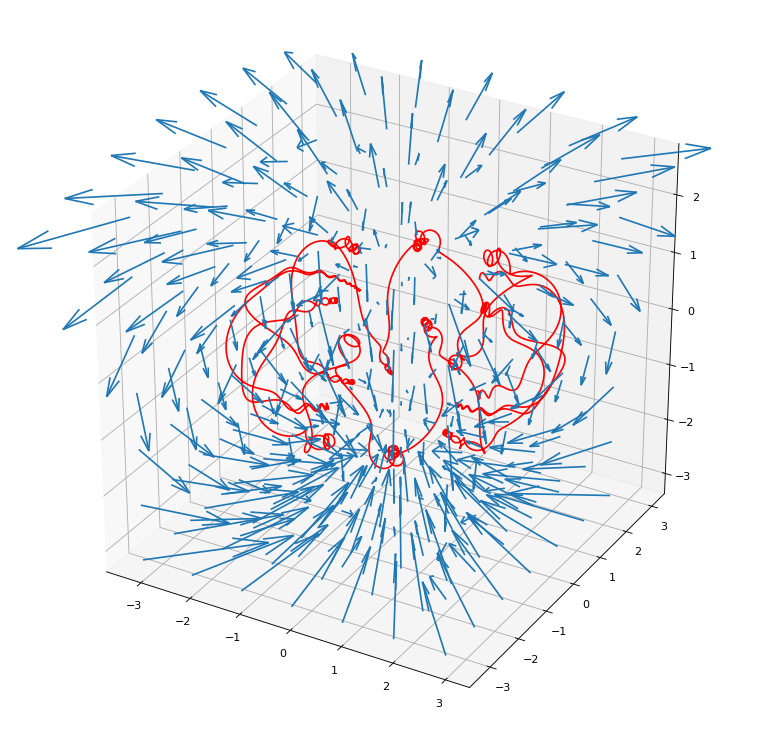

In [54]:
fig = plt.figure()
fig=plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, u, v, w, length=0.1) # vizualizace pole modře
ax.plot(reseni[:,0],reseni[:,1],reseni[:,2],'r') # vizualizace dráhy částice v poli červeně
plt.show()